# Monte Carlo simulation

## Pure Python

In [1]:
from time import time 

In [2]:
from math import exp, sqrt, log

In [3]:
from random import gauss, seed

In [4]:
seed(20000)

In [5]:
t0 = time()

In [6]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
M = 50 # number of time steps
dt = T / M # length of time interval
I = 250000 # number of path

In [7]:
S = []
for i in range(I):
    path = []
    for t in range(M + 1):
        if t == 0:
            path.append(S0)
        else:
            z = gauss(0.0, 1.0)
            St = path[t-1] * exp((r - 0.5 * sigma ** 2) * dt 
                                + sigma * sqrt(dt) * z)
            path.append(St)
    S.append(path)

In [8]:
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I

In [9]:
tpy = time() - t0

In [10]:
print("European Option Value %7.3f" % C0)
print("Duration in seconds   %7.3f" % tpy)

European Option Value   7.999
Duration in seconds    19.547


## Vectorization with NumPy

In [11]:
import math
import numpy as np
from time import time

In [12]:
np.random.seed(20000)
t0 =  time()

In [13]:
S0 = 100
K = 105
T = 1.0
r = 0.05
sigma = 0.2
M = 50
dt = T / M
I = 250000

In [14]:
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    z = np.random.standard_normal(I) # pseudo random numbers
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                            + sigma * math.sqrt(dt) *z)
    # vectorized operation per time step over all paths
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] -  K, 0)) / I

In [15]:
tnp1 = time() - t0

In [16]:
print("European Option Value %7.3f" % C0)
print("Duration in seconds   %7.3f" % tnp1)

European Option Value   8.037
Duration in seconds     1.133


## Full vectorization with Log Euler Schem

In [17]:
import math
from numpy import *
from time import time

In [18]:
random.seed(20000)
t0 = time()

In [19]:
S0 = 100
K = 105
T = 1.0
r = 0.05
sigma = 0.2
M = 50
dt = T / M
I = 250000

In [20]:
# Simulating I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt 
                   + sigma * math.sqrt(dt)
                   * random.standard_normal((M + 1, I)), axis=0))

In [21]:
S[0] = S0

In [22]:
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I

In [23]:
tnp2 = time() - t0

In [24]:
print("European Option Value %7.3f" % C0)
print("Duration in seconds   %7.3f" % tnp2)

European Option Value   8.166
Duration in seconds     1.385


In [25]:
import matplotlib.pyplot as plt

Text(0,0.5,'index level')

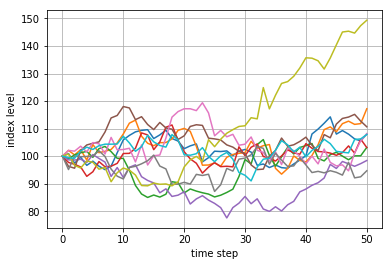

In [28]:
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')

Text(0,0.5,'frequency')

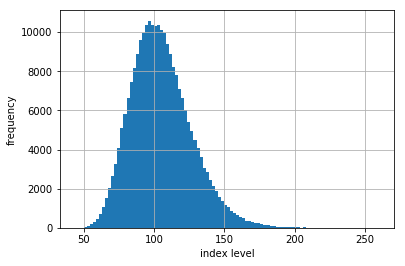

In [36]:
plt.hist(S[-1], bins=S0)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
# Histogram of all simulated end of period index level values